# Daily TXDHHS COVID-19 Analysis

Source: [https://txdshs.maps.arcgis.com/apps/opsdashboard/index.html#/ed483ecd702b4298ab01e8b9cafc8b83](https://txdshs.maps.arcgis.com/apps/opsdashboard/index.html#/ed483ecd702b4298ab01e8b9cafc8b83)

**Disclaimer: Data & analysis in this repository is provided as-is. I make no claims to the quality or accuracy of the data & analysis contained in this repository. It is your responsibility to consult with actual experts and/or authorative sources before taking any action.**

## Import Data

In [1]:
from glob import glob
from os.path import join
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np

path = 'data'

frames = list()
for f in glob(join(path, '*.csv')):
    tmp_df = pd.read_csv(f, parse_dates=['updated', 'ts'], infer_datetime_format=True)
    tmp_df['file'] = f
    frames.append(tmp_df)
    

df = pd.concat(frames) \
    .sort_values(by='updated', ascending=True) \
    .reset_index(drop=True) \
    [['updated', 'total_tests', 'currently_in_hospitals', 'public_labs', 'private_labs', 'cases_reported', 'fatalities', 'file', 'ts']]


# Answers: of all the tests given, what percentage were positive? 
# Measures: COVID19 spread and is correlated with regional R0. 
# Lower is better. 
df['positive_pct'] = df['cases_reported'] / df['total_tests'] 

# 
df['fatality_pct'] = df['fatalities']  / df['cases_reported']


df['hosp_pct'] = df['currently_in_hospitals'] / df['cases_reported']

# Diaplay last 14 days
df.head(14)

,updated,total_tests,currently_in_hospitals,public_labs,private_labs,cases_reported,fatalities,file,ts,positive_pct,fatality_pct,hosp_pct
0,2020-04-18 12:45:00,176239.0,1321.0,8832.0,167407.0,18260.0,453.0,data/2020-04-18.csv,2020-04-18 14:17:00.168721,0.103609,0.024808,0.072344
1,2020-04-20 11:45:00,190394.0,1411.0,9234.0,181160.0,19458.0,495.0,data/2020-04-19.csv,2020-04-20 12:04:03.843520,0.102199,0.025439,0.072515
2,2020-04-21 12:00:00,205399.0,1419.0,9369.0,196030.0,20196.0,517.0,data/2020-04-21.csv,2020-04-22 05:32:31.826072,0.098326,0.025599,0.070261
3,2020-04-22 12:15:00,216783.0,1678.0,9642.0,207141.0,21069.0,543.0,data/2020-04-22.csv,2020-04-22 12:56:51.228844,0.097189,0.025772,0.079643
4,2020-04-23 11:30:00,225078.0,1649.0,10002.0,215076.0,21944.0,561.0,data/2020-04-23.csv,2020-04-24 06:42:15.476413,0.097495,0.025565,0.075146
5,2020-04-24 11:30:00,242547.0,1597.0,10423.0,232124.0,22806.0,593.0,data/2020-04-24.csv,2020-04-25 09:31:44.583391,0.094027,0.026002,0.070025
6,2020-04-25 12:00:00,262816.0,1597.0,10634.0,252182.0,23773.0,623.0,data/2020-04-25.csv,2020-04-26 05:05:31.005962,0.090455,0.026206,0.067177
7,2020-04-26 11:40:00,276021.0,1542.0,10823.0,265198.0,24631.0,648.0,data/2020-04-26.csv,2020-04-27 06:28:46.298432,0.089236,0.026308,0.062604
8,2020-04-27 12:10:00,290517.0,1563.0,11129.0,279388.0,25297.0,663.0,data/2020-04-27.csv,2020-04-28 08:45:14.855936,0.087076,0.026209,0.061786
9,2020-04-28 12:00:00,300384.0,1682.0,11350.0,289034.0,26171.0,690.0,data/2020-04-28.csv,2020-04-29 06:04:16.920054,0.087125,0.026365,0.064270


## Percent Positive

Answers: of all the tests given, what percentage were positive?

Measures: COVID19 spread, correlated with regional R0. 

Lower is better. 

$\text{Positive Percent}=\frac{\text{Cases Reported}}{\text{Total Tests}}$

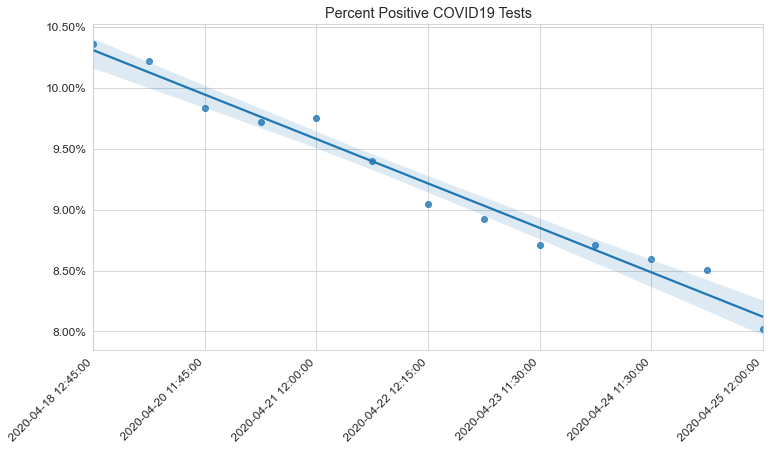

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (12,6))  


sns.regplot(x=np.arange(0,df.shape[0]), y=df['positive_pct'])

plt.title('Percent Positive COVID19 Tests', fontweight='light', fontsize='x-large')


# Y axis
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(float(x), '.2%')))
plt.ylabel('', fontweight='light', fontsize='large')
plt.yticks(
    fontweight='light',
    fontsize='large'  
);


# X axis
ax.set_xticklabels(df['updated'])
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xlabel('', fontweight='light', fontsize='large')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

## Percent Hospitalized

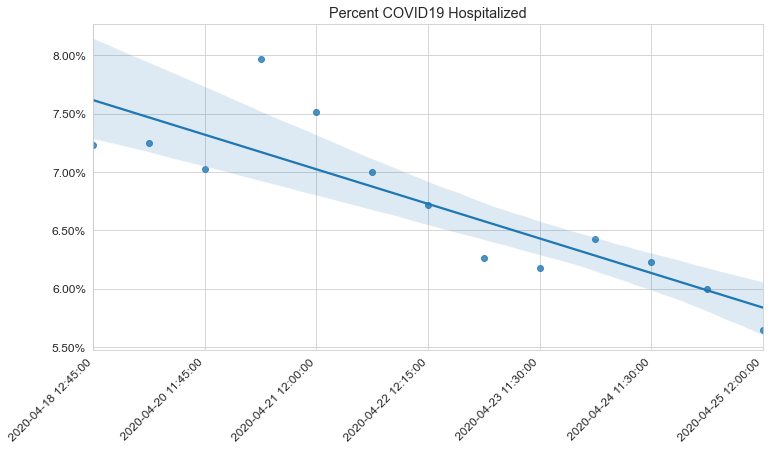

In [3]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (12,6))  


sns.regplot(x=np.arange(0,df.shape[0]), y=df['hosp_pct'])

plt.title('Percent COVID19 Hospitalized', fontweight='light', fontsize='x-large')


# Y axis
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(float(x), '.2%')))
plt.ylabel('', fontweight='light', fontsize='large')
plt.yticks(
    fontweight='light',
    fontsize='large'  
);


# X axis
ax.set_xticklabels(df['updated'])
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xlabel('', fontweight='light', fontsize='large')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

## Percent Fatalities

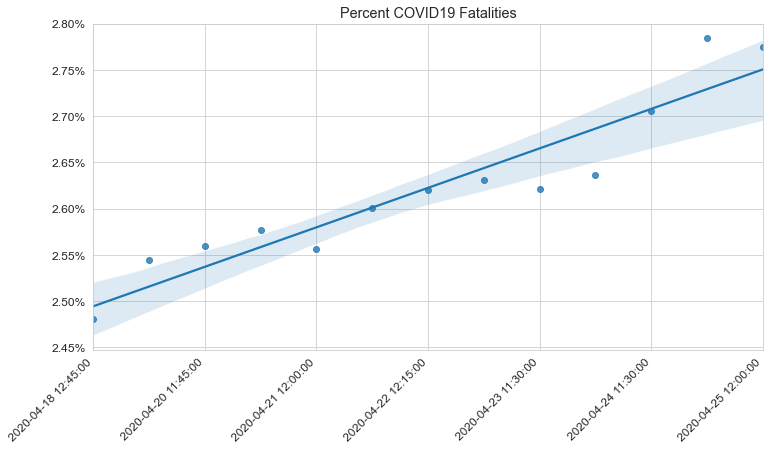

In [4]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (12,6))  


sns.regplot(x=np.arange(0,df.shape[0]), y=df['fatality_pct'])

plt.title('Percent COVID19 Fatalities', fontweight='light', fontsize='x-large')


# Y axis
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(float(x), '.2%')))
plt.ylabel('', fontweight='light', fontsize='large')
plt.yticks(
    fontweight='light',
    fontsize='large'  
);


# X axis
ax.set_xticklabels(df['updated'])
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xlabel('', fontweight='light', fontsize='large')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

## Total Tests

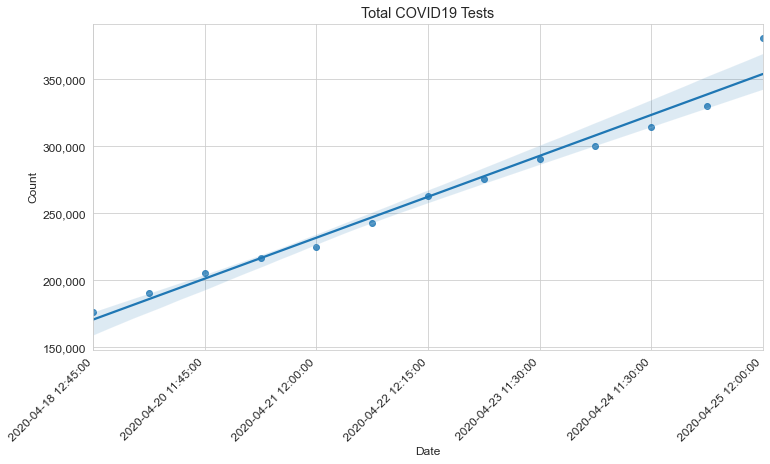

In [5]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (12,6))  


sns.regplot(x=np.arange(0,df.shape[0]), y=df['total_tests'])

plt.title('Total COVID19 Tests', fontweight='light', fontsize='x-large')


# Y axis
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Count', fontweight='light', fontsize='large')
plt.yticks(
    fontweight='light',
    fontsize='large'  
);


# X axis
ax.set_xticklabels(df['updated'])
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xlabel('Date', fontweight='light', fontsize='large')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);